# 데이터사이언스 스쿨

## 2.1 데이터 전처리 기초

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [5]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [6]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [14]:
import missingno as msno

<function matplotlib.pyplot.show(close=None, block=None)>

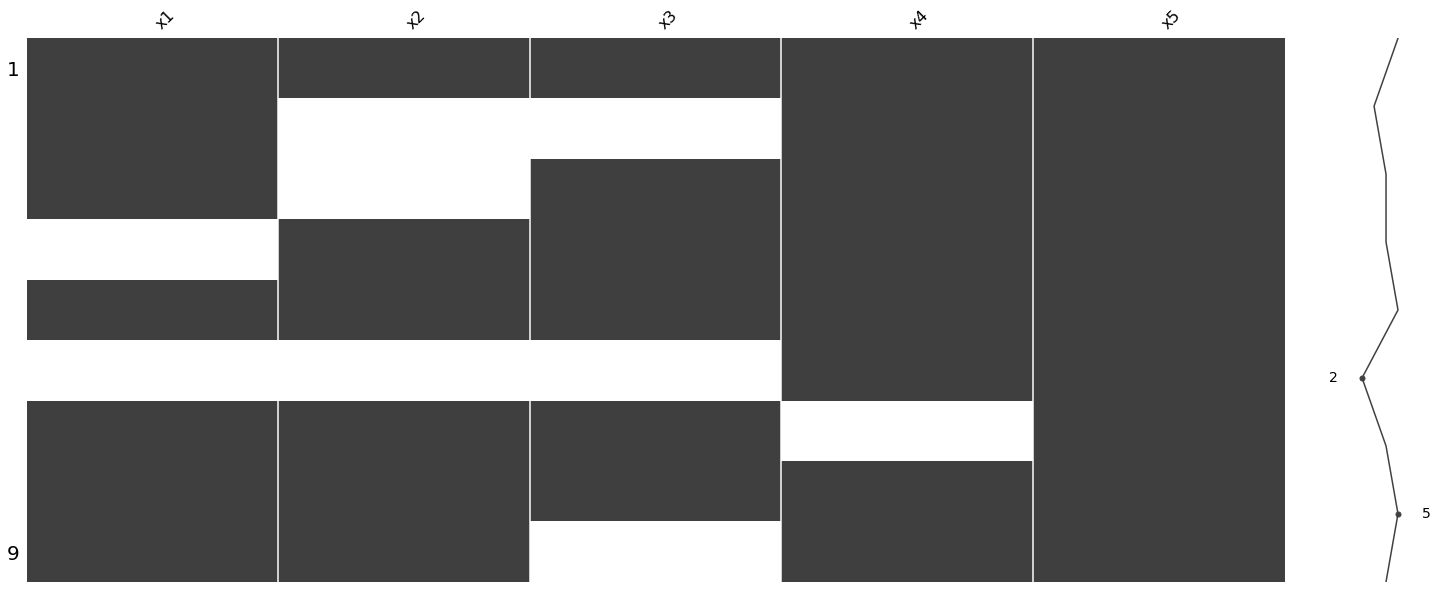

In [15]:
msno.matrix(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

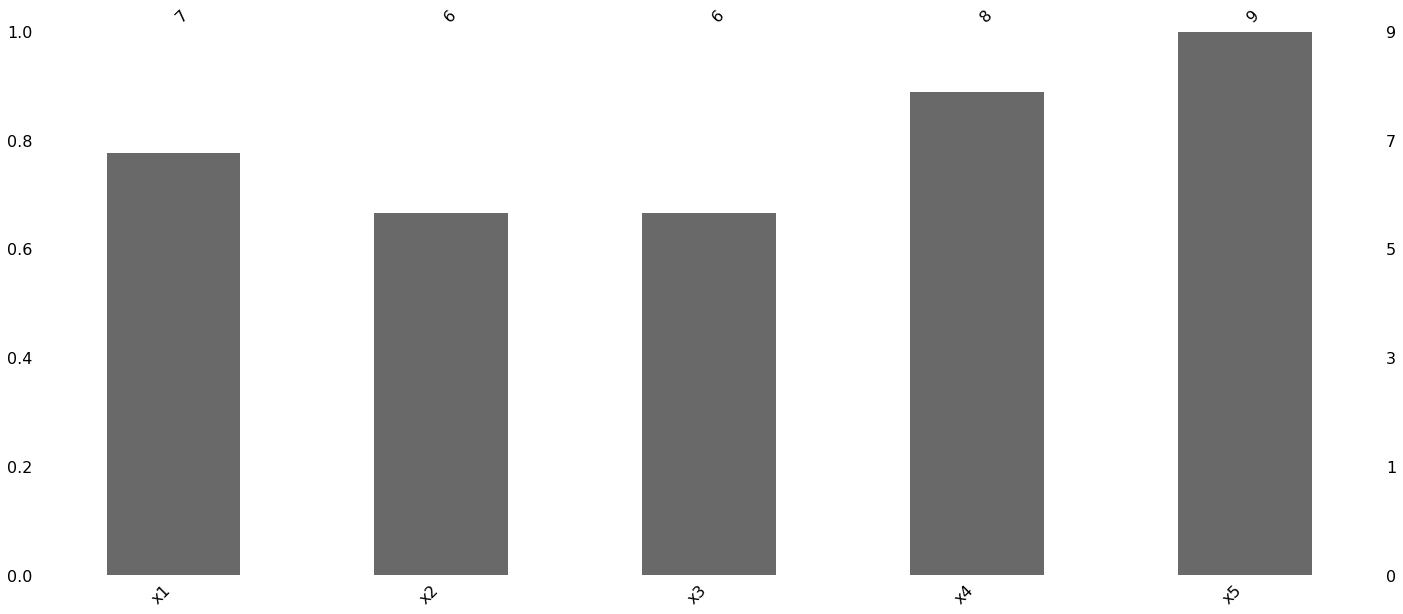

In [16]:
msno.bar(df)
plt.show

In [17]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


<function matplotlib.pyplot.show(close=None, block=None)>

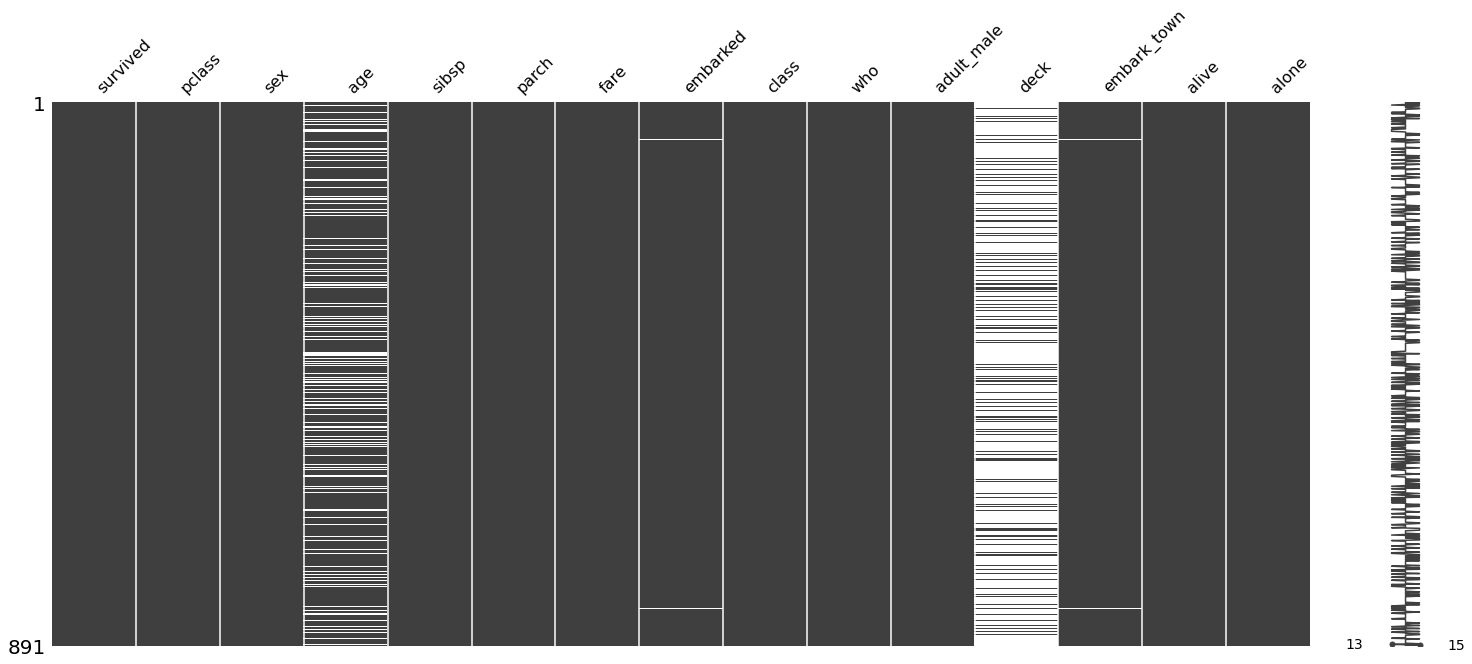

In [18]:
msno.matrix(titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

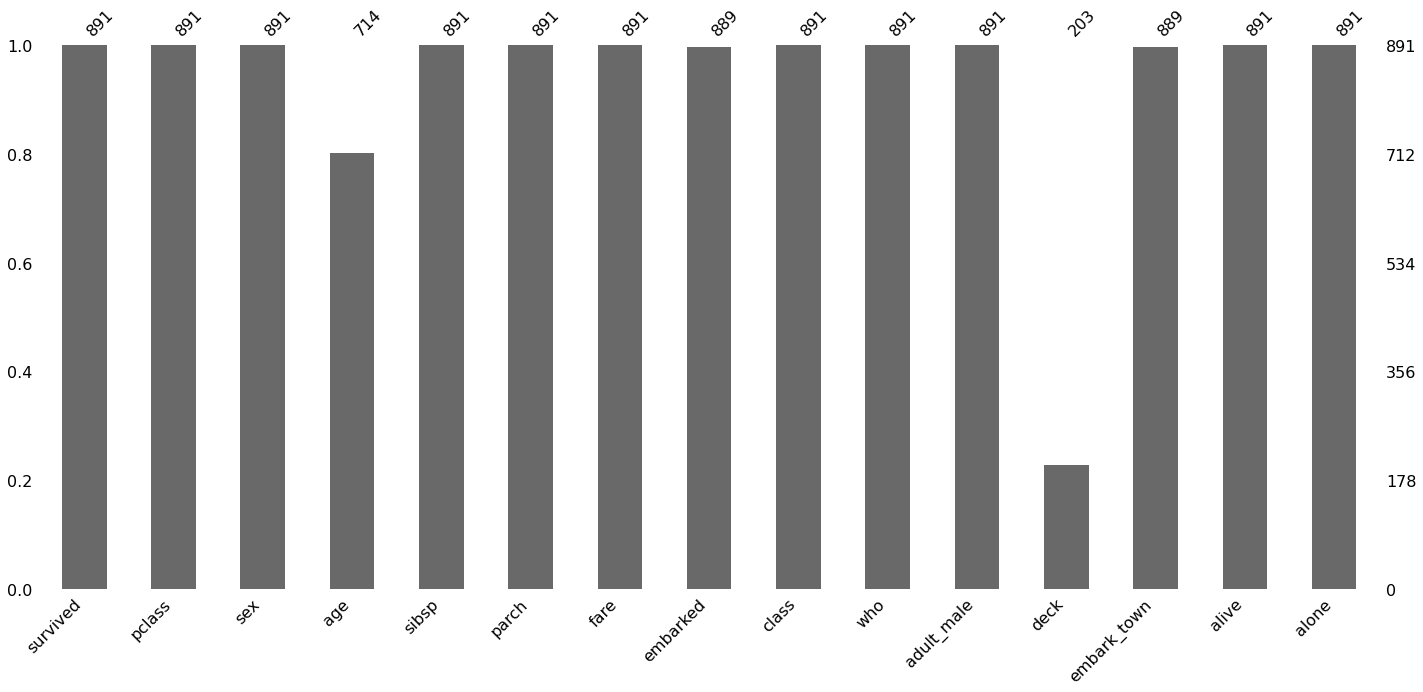

In [19]:
msno.bar(titanic)
plt.show

In [21]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [22]:
df.dropna(axis =1 )

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [23]:
df.dropna(thresh = 7, axis =1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


<function matplotlib.pyplot.show(close=None, block=None)>

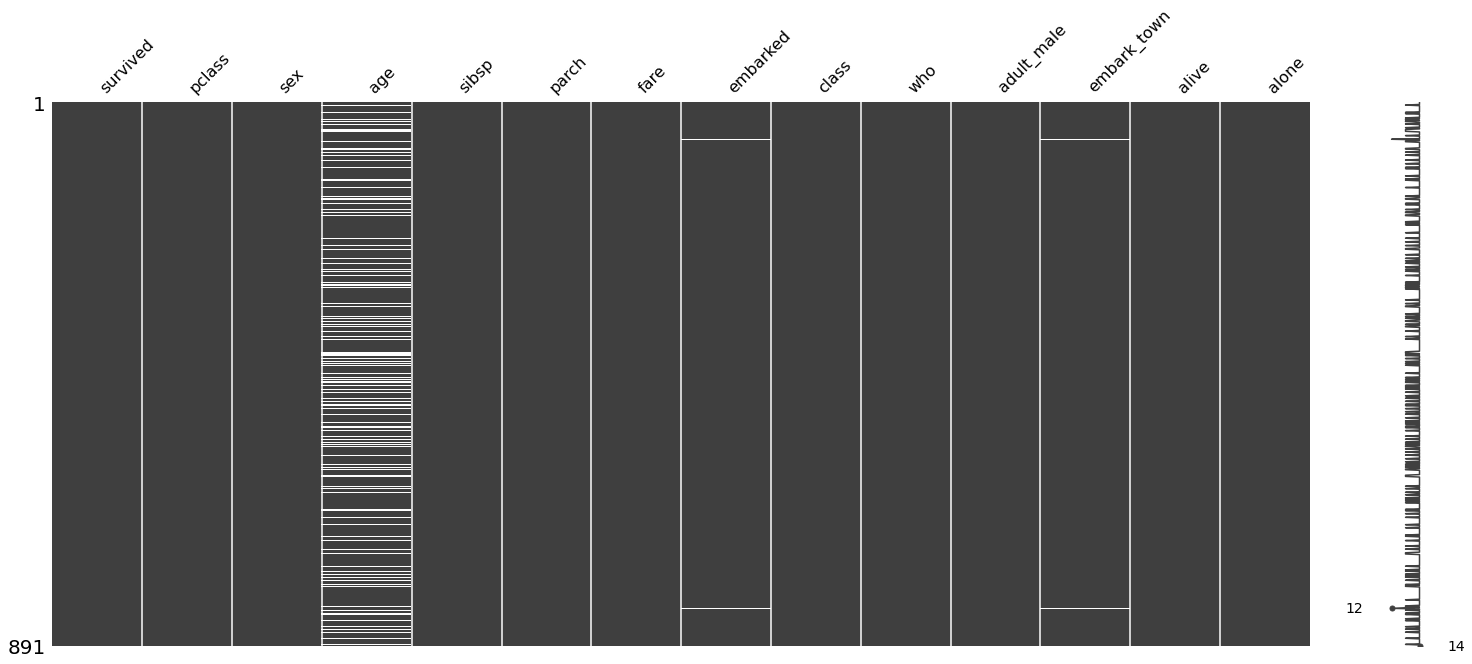

In [29]:
titanic = titanic.dropna(thresh = int(len(titanic)/2), axis =1 )
msno.matrix(titanic)
plt.show

In [33]:
from sklearn.impute import SimpleImputer

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embark_town', ylabel='count'>

Text(0.5, 1.0, 'embark_town 데이터의 분포')

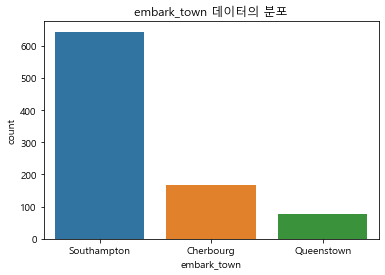

In [49]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show()

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

Text(0.5, 1.0, 'embarked 데이터의 분포')

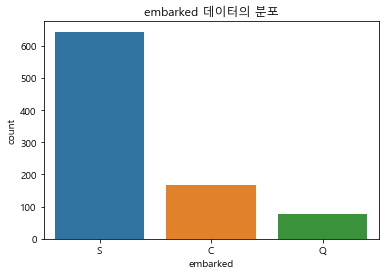

In [51]:
sns.countplot(titanic.embarked)
plt.title("embarked 데이터의 분포")
plt.show()

<AxesSubplot:>

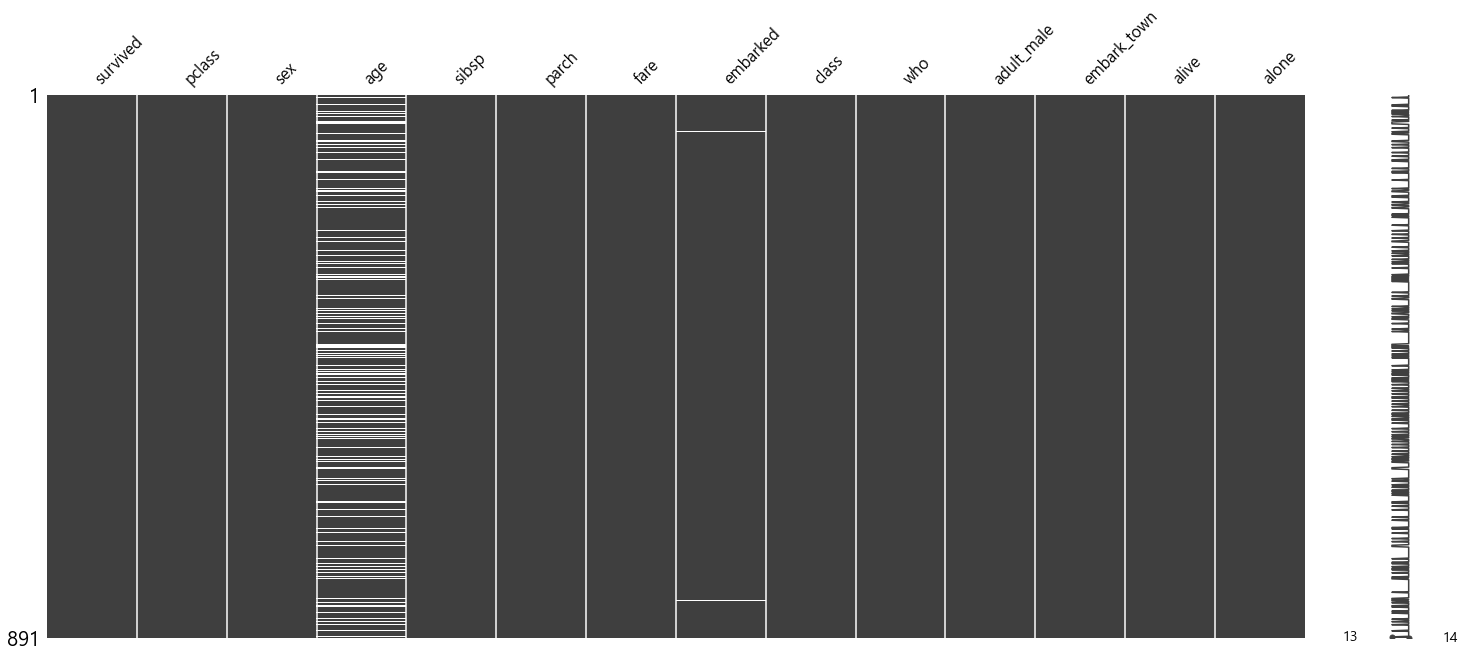

In [53]:
imputer_embark_town =SimpleImputer(strategy = "most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
msno.matrix(titanic)
plt.show()

<AxesSubplot:>

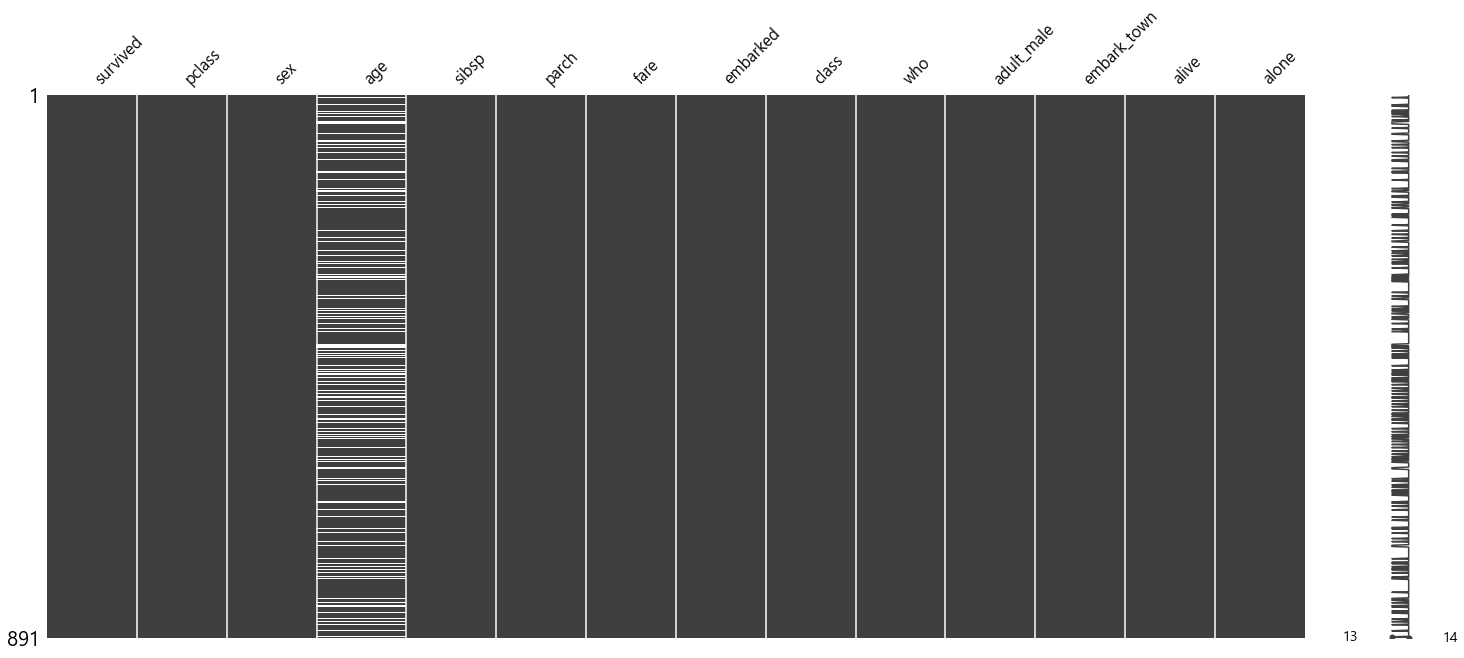

In [54]:
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])
msno.matrix(titanic)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

Text(0.5, 1.0, 'age 데이터의 분포')

<function matplotlib.pyplot.show(close=None, block=None)>

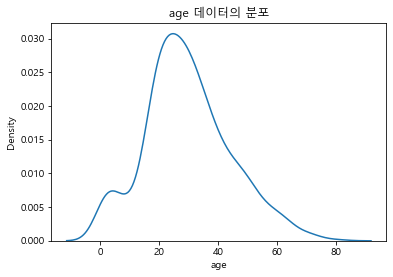

In [60]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show

In [65]:
titanic.dtypes['age']

dtype('float64')

In [68]:
titanic['age'].head

<bound method NDFrame.head of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64>

<AxesSubplot:>

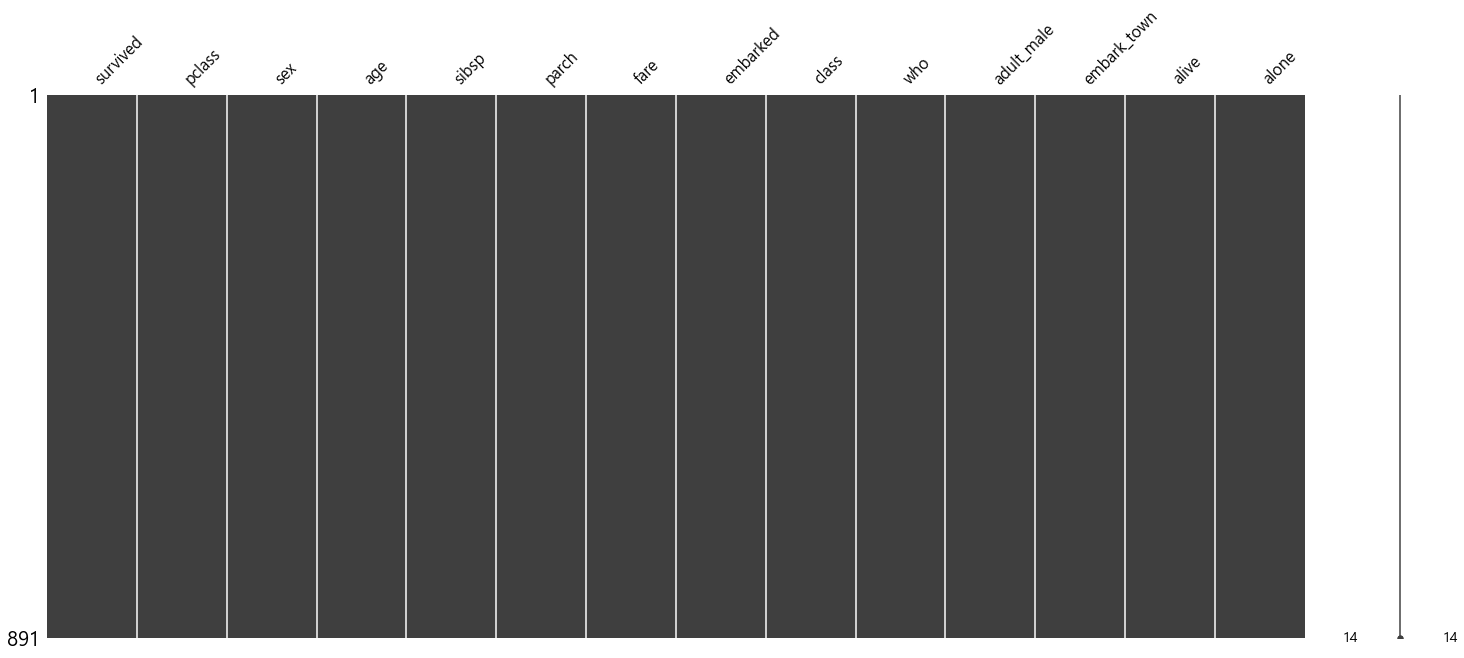

In [69]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

In [71]:
titanic['age'].head

<bound method NDFrame.head of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64>

In [70]:
imputer_age = SimpleImputer(strategy = "median")
titanic["age"] = imputer_age.fit_transform([["age"]])
msno.matrix(titanic)
plt.show()

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'age'